# Tutorial for Hybrid Modeling of Entanglement Distribution Sources

In this tutorial, we will explore the complete process of modeling entanglement distribution sources using a hybrid Gaussian/non-Gaussian modeling approach. The fundamental theory for this approach can be found in (the accompanying paper that this code will be published with). To being, let's call the functions needed for modeling. ?

In [1]:
using Pkg; Pkg.develop(path="..")
using Genqo
using LinearAlgebra
using Plots

   Resolving package versions...
     Project No packages added to or removed from `~/genqo.jl/tutorial/Project.toml`
    Manifest No packages added to or removed from `~/genqo.jl/tutorial/Manifest.toml`


## Modeling a Two-mode squeezed vacuum state

Fundamental to all of these sources is the two-mode squeezed vacuum state. As such, we will begin by modeling a single two-mode squeezed vacuum state, and verifying the functionality of the hybrid tools for correctly modeling such a state as analytical solutions for the TMSV state are readily available. 

To begin, let's define functions for the analytical expression for the probability of a coincidence measurement, i.e. the probability that we measure a single photon in each mode simultaneously. 

In [2]:
# In the ideal case, as a function of the mean photon number
function tmsvp(n, Nstst)
    num = Nstst^n
    den = (1 + Nstst)^(n+1)
    return num/den
end

# In the presence of loss, as a function of the mean photon number
function tmsv_1_loss(Nstst, η)
    λ = Nstst/(1 + Nstst)
    num  = 1 + ((1 - η)^2)*λ
    den = (1 - ((1 - η)^2)*λ)^3
    c = (1 - λ)*λ*(η^2)
    return c*(num/den)
end

tmsv_1_loss (generic function with 1 method)

Next, let's calculate the same quantity, using the hybrid toolbox functions. First, when no loss is present.

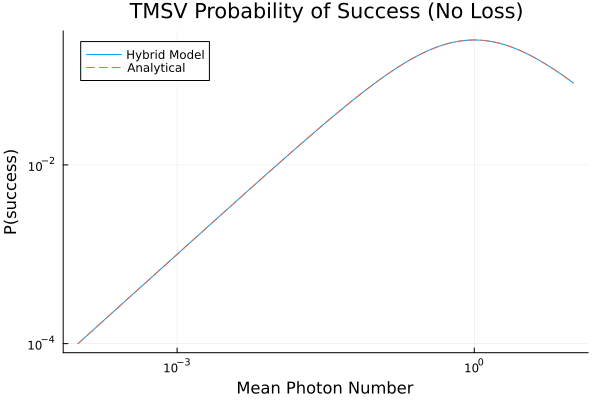

In [3]:
μ = logrange(1e-4, 10, 200)
ηᵈ = 10^(-0/10)
Ps = tmsv.probability_success.(μ, ηᵈ)

# Plot results
plot(μ, Ps, label="Hybrid Model", xlabel="Mean Photon Number", ylabel="P(success)", legend=:topleft, title="TMSV Probability of Success (No Loss)", xscale=:log10, yscale=:log10)
plot!(μ, tmsvp.(1, μ), label="Analytical", linestyle=:dash)

Next, introducing loss

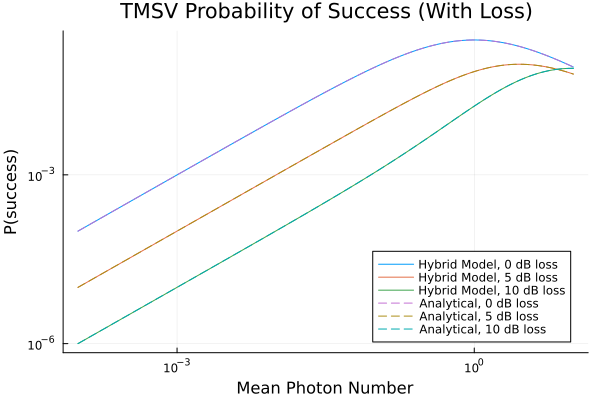

In [4]:
μ = logrange(1e-4, 10, 200)
loss_dB = [0, 5, 10]
ηᵈ = 10 .^ (-loss_dB/10)
Ps = tmsv.probability_success.(μ, ηᵈ')
Ps_an = tmsv_1_loss.(μ, ηᵈ')

# Plot results
plot(μ, Ps[:,1], label="Hybrid Model, 0 dB loss", xlabel="Mean Photon Number", ylabel="P(success)", legend=:bottomright, title="TMSV Probability of Success (With Loss)", xscale=:log10, yscale=:log10)
plot!(μ, Ps[:,2], label="Hybrid Model, 5 dB loss")
plot!(μ, Ps[:,3], label="Hybrid Model, 10 dB loss")
plot!(μ, Ps_an[:,1], label="Analytical, 0 dB loss", linestyle=:dash)
plot!(μ, Ps_an[:,2], label="Analytical, 5 dB loss", linestyle=:dash)
plot!(μ, Ps_an[:,3], label="Analytical, 10 dB loss", linestyle=:dash)

We see that we reproduce the analytical results exactly. This simple example acts as a corner case for the functionality of the hybrid modeling approach. But, it does not demonstrate any sort of advantage (something like using a sledgehammer to smash a cockroach). As we model the entanglement sources, we will see the true benefit of the hybrid modeling approach.  

## Modeling an SPDC source

With the demonstration of a TMSV state in the previous section, we are now armed with the basic capabilities for modeling an SPDC source, which is composed of two TMSV states and an idler mode swap. We will show how to calculate the photon-photon density matrix for this source, as well as the spin-spin density matrix when the source state has been loaded into Duan-Kimble style quantum memories.

### Calculating the photon-photon density matrix

First, let's calculate the trace of the photon-photon density matrix as a corner case

In [5]:
# function removed

Next, let's calculate the fidelity

In [6]:
spdc.fidelity(0.1, 1, 1)

0.15026296018031549

Let's do it over a range, and plot

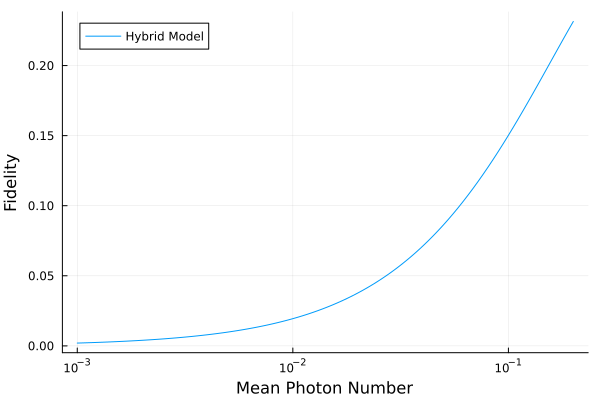

In [7]:
μ = logrange(1e-3, 0.2, 100)
Fid = spdc.fidelity.(μ, 1, 1)

plot(μ, Fid, xlabel="Mean Photon Number", ylabel="Fidelity", label="Hybrid Model", xscale=:log10)

This matches the results from Dhara et al. Let's look at the higher mean photon number

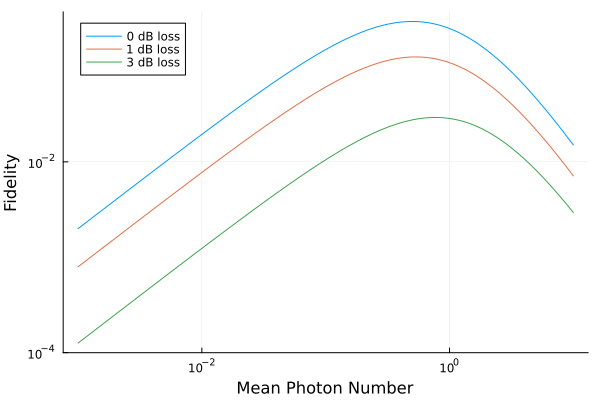

In [8]:
μ = logrange(1e-3, 10, 100)
loss_dB = [0,1,3]
ηᵗ = 10 .^ (-loss_dB./10)
Fid = spdc.fidelity.(μ, ηᵗ', 1) # orient μ and ηᵗ along different axes to broadcast over each independently

plot(μ, Fid[:,1], xlabel="Mean Photon Number", ylabel="Fidelity", label="0 dB loss", xscale=:log10, yscale=:log10, legend=:topleft)
plot!(μ, Fid[:,2], label="1 dB loss")
plot!(μ, Fid[:,3], label="3 dB loss")

### Calculating the spin-spin density matrix

In [9]:
# Unnormalized density matrix
ρ_un = spdc.spin_density_matrix(10, 1, 1, [0,1,0,1])
display(ρ_un)

# Normalized density matrix
ρ_n = ρ_un / tr(ρ_un)
display(ρ_n)


4×4 Matrix{ComplexF64}:
   0.00187829+0.0im  0.0+0.0im  0.0+0.0im   -0.00187829+0.0im
  7.16828e-21+0.0im  0.0+0.0im  0.0+0.0im  -7.16828e-21+0.0im
 -7.16828e-21+0.0im  0.0+0.0im  0.0+0.0im   7.16828e-21+0.0im
  -0.00187829+0.0im  0.0+0.0im  0.0+0.0im    0.00187829+0.0im

4×4 Matrix{ComplexF64}:
         0.5+0.0im  0.0+0.0im  0.0+0.0im         -0.5+0.0im
  1.9082e-18+0.0im  0.0+0.0im  0.0+0.0im  -1.9082e-18+0.0im
 -1.9082e-18+0.0im  0.0+0.0im  0.0+0.0im   1.9082e-18+0.0im
        -0.5+0.0im  0.0+0.0im  0.0+0.0im          0.5+0.0im

### Calculating performance metrics

A key functionality of these tools is the ability to calculate performance metrics, such as fidelity, probability of success, and entanglement distribution rate. These performance metrics allow us to paint a picture about the source and how it operates in comparison to other sources, such as the cascaded source which we will consider later. 

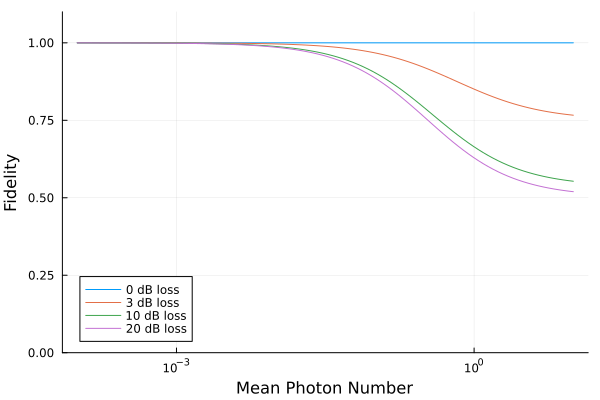

In [10]:
μ = logrange(1e-4, 10, 100)
loss_dB = [0, 3, 10, 20]
ηᵗ = 10 .^ (-loss_dB/10)
ρ_un = spdc.spin_density_matrix.(μ, ηᵗ', 1, [[0,1,0,1]]) # double-bracketed array required for broadcast

Ps = real.(tr.(ρ_un))
fidelity(ρ::Matrix) = real( (1/2)*(ρ[1,1] - ρ[1,4] - ρ[4,1] + ρ[4,4])/tr(ρ) )
Fid = fidelity.(ρ_un)

plot(μ, Fid[:,1], xlabel="Mean Photon Number", ylabel="Fidelity", label="0 dB loss", xscale=:log10, ylim=(0,1.1), legend=:bottomleft)
plot!(μ, Fid[:,2], label="3 dB loss")
plot!(μ, Fid[:,3], label="10 dB loss")
plot!(μ, Fid[:,4], label="20 dB loss")

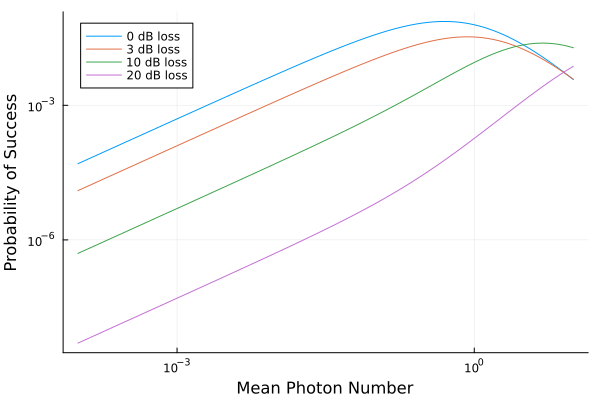

In [11]:
plot(μ, Ps[:,1], xlabel="Mean Photon Number", ylabel="Probability of Success", label="0 dB loss", xscale=:log10, yscale=:log10, legend=:topleft)
plot!(μ, Ps[:,2], label="3 dB loss")
plot!(μ, Ps[:,3], label="10 dB loss")
plot!(μ, Ps[:,4], label="20 dB loss")

## Modeling a Cascaded source

A cascaded source is constructed in a manner similar to an SPDC such, but instead of it's constituent components being two TMSV states, it is two SPDC source states. What makes the cascade source unique is that a heralding bell state measurement occurs between the idler modes of each source, heralding the presence of bell state production deterministically in the presence of quantum memories at the receiver site. 

In this modeling process, we will sometimes refer to the Cascaded source as the ZALM source. Mathematically, the single-mode ZALM source is equivalent to the single-mode cascaded source. For higher mode, the ZALM source is the frequency multiplexed version of the source, whereas the cascaded source is the spatially multiplexed version of the source. Hence, for the single-mode analysis present in what follows, the terminology may be used interchangably. 

### Photon-photon state calculations

#### Calculating Probability of Generation of the photon-photon state

Let's calculate the photon-photon probability of success for 0, 3, and 5 dB loss

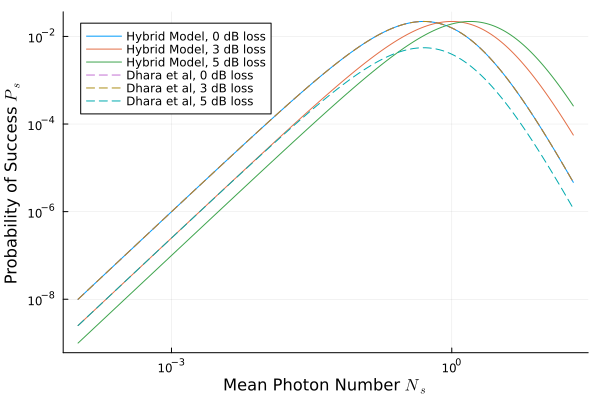

In [12]:
μ = logrange(1e-4, 20, 200)
loss_dB = [0, 3, 5]
ηᵇᵗ = 10 .^ (-loss_dB/10) # sweep BSM and transmission efficiencies together
Ps = zalm.probability_success.(μ, ηᵇᵗ', 1, ηᵇᵗ', 0)

# Analytical expressions, derived in the original cascaded source papers
PsenP(μ::Real) = μ^2 / (1+μ)^6
Ps_an = PsenP.(μ)

plot(μ, Ps[:,1], xlabel="Mean Photon Number \$N_s\$", ylabel="Probability of Success \$P_s\$", label="Hybrid Model, 0 dB loss", xscale=:log10, yscale=:log10, legend=:topleft)
plot!(μ, Ps[:,2], label="Hybrid Model, 3 dB loss")
plot!(μ, Ps[:,3], label="Hybrid Model, 5 dB loss")

plot!(μ, Ps_an, label="Dhara et al, 0 dB loss", linestyle=:dash)
plot!(μ, ηᵇᵗ[1]^2 * Ps_an, label="Dhara et al, 3 dB loss", linestyle=:dash)
plot!(μ, ηᵇᵗ[2]^2 * Ps_an, label="Dhara et al, 5 dB loss", linestyle=:dash)

We can observe that in the low mean photon number regime, the hybrid modeling approach matches the results of the paper, but in the high mean photon number regime they do not. This showcases the power of the hybrid modeling approach as mean photon number approximations are not needed. In particular, we see a discrepancy in the effect of loss. With the approximate approach, we see that we would expect a single optimized value for the mean photon number to maximize the probability of success. In reality, for high loss the peak probability of success shifts towards higher mean photon number values. 

Now, let's include dark clicks

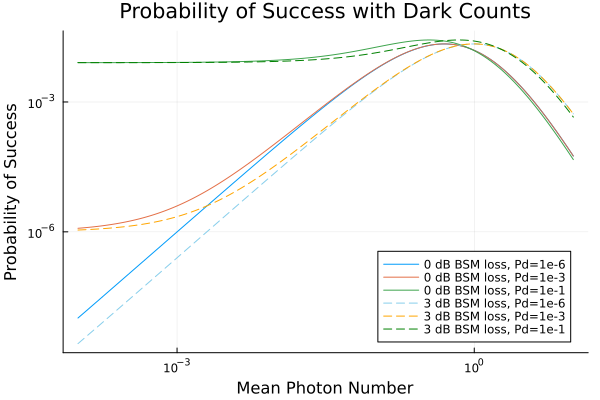

In [13]:
μ = logrange(1e-4, 10, 200)
loss_dB = [0, 3]
ηᵇ = 10 .^ (-loss_dB/10)
Pd = [1e-6, 1e-3, 1e-1]
Ps_dark = zalm.probability_success.(μ, 1, 1, ηᵇ', reshape(Pd, 1, 1, :))

plot(μ, Ps_dark[:,1,1], title="Probability of Success with Dark Counts", xlabel="Mean Photon Number", ylabel="Probability of Success", label="0 dB BSM loss, Pd=1e-6", xscale=:log10, yscale=:log10, legend=:bottomright)
plot!(μ, Ps_dark[:,1,2], label="0 dB BSM loss, Pd=1e-3")
plot!(μ, Ps_dark[:,1,3], label="0 dB BSM loss, Pd=1e-1")
plot!(μ, Ps_dark[:,2,1], label="3 dB BSM loss, Pd=1e-6", linestyle=:dash, color=:skyblue)
plot!(μ, Ps_dark[:,2,2], label="3 dB BSM loss, Pd=1e-3", linestyle=:dash, color=:orange)
plot!(μ, Ps_dark[:,2,3], label="3 dB BSM loss, Pd=1e-1", linestyle=:dash, color=:green)

#### Calculating the fidelity of the photon-photon state 

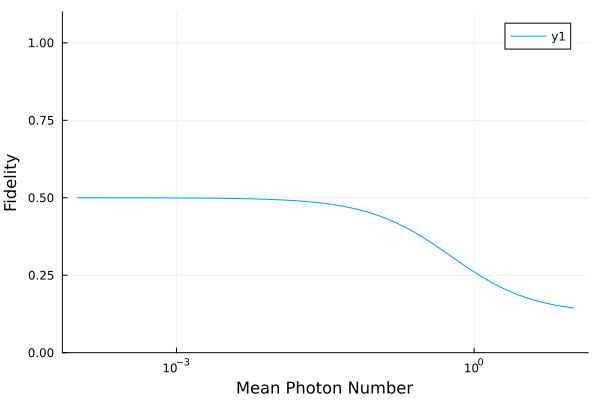

In [14]:
μ = logrange(1e-4, 10, 100)
Fid = zalm.fidelity.(μ, 1, 1, 10^(-1/10))

plot(μ, Fid, xlabel="Mean Photon Number", ylabel="Fidelity", xscale=:log10, ylim=(0,1.1))

These numbers are consistent with the results from the cascaded source paper (see figure 9)

#### Calculating the photon-photon density matrix

One of the principle advantages of the hybrid approach is the flexibility in what can be calculated. We have complete access to any density matrix element, and as such can choose desired approximations such as photon number cut off. This tunability in approximations is what will likely make this approach widely usable for other applications beyond those considered here. In the hybrid_model_functions.py file we have functions for calculating the photon-photon density matrix up to a 4 photon cut off. 

### Spin-spin state

Calculating the spin-spin state is the most complicated calculation thus far as it requires calculating sums of higher order moments. The higher the order of the moment, the more computaitonally intense the calculation. Therefore, in this section we provide the scafolding for hold to calculate the spin-spin state, but the results show come from trials that were previously calculated. 

In [15]:
ρ = zalm.spin_density_matrix(1e-3, 1, 1, 1, [1,0,1,1,0,0,1,0])
ρ / tr(ρ)

4×4 Matrix{ComplexF64}:
          0.5+0.0im   -6.9415e-18+0.0im  …          -0.5+0.0im
  2.07209e-18+0.0im  -1.96849e-18+0.0im     -2.07209e-18+0.0im
 -2.07209e-18+0.0im   1.96849e-18+0.0im      2.07209e-18+0.0im
         -0.5+0.0im    6.9415e-18+0.0im              0.5+0.0im

Next, let's calculate the probability of success for the photon-photon case

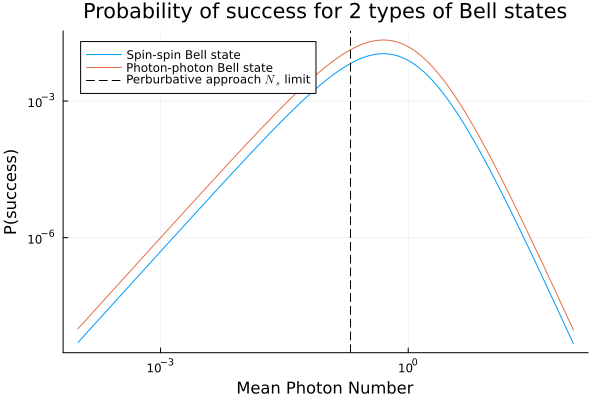

In [16]:
μ = logrange(1e-4, 1e2, 100)
ρ = zalm.spin_density_matrix.(μ, 1, 1, 1, [[1,0,1,1,0,0,1,0]])
Ps_spin = real.(tr.(ρ)) # TODO: implement explicit spin_probability_success function
Ps_photon = zalm.probability_success.(μ, 1, 1, 1, 0)

plot(μ, Ps_spin, label="Spin-spin Bell state", xlabel="Mean Photon Number", ylabel="P(success)", legend=:topleft, title="Probability of success for 2 types of Bell states", xscale=:log10, yscale=:log10)
plot!(μ, Ps_photon, label="Photon-photon Bell state")
vline!([0.2], label="Perburbative approach \$N_s\$ limit", linestyle=:dash, color=:black)

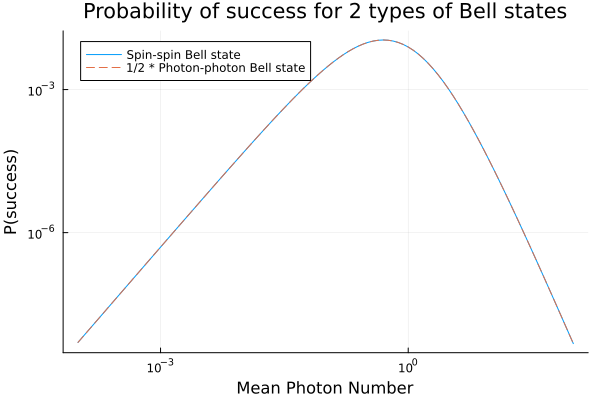

In [17]:
# TODO: do we want this comparison to show Ps_spin = 1/2 * Ps_photon?
plot(μ, Ps_spin, label="Spin-spin Bell state", xlabel="Mean Photon Number", ylabel="P(success)", legend=:topleft, title="Probability of success for 2 types of Bell states", xscale=:log10, yscale=:log10)
plot!(μ, Ps_photon/2, label="1/2 * Photon-photon Bell state", linestyle=:dash)

We see that the probability of success for the spin-spin state matches the probability of success of the photon-photon state by a factor of 1/2, as expected when there is no loss in the system.